In [1]:
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Introduction to Scientific Programming in Python

## Python Course Lecture 5: Matrices and Image Analysis

# A Matrix is a Multi-Dimensional Array.
  - 1D Array: A **Row** of **Elements**
  - 2D Array: A **Column** of **Rows** of **Elements**
  - 3D Array: A **Sheet** of **Columns** of **Rows** of **Elements**

In [2]:
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
A


[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

## NumPy Arrays Understand Lists of Lists to be 2D!

In [3]:
import numpy as np
mat = np.array(A)
mat

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [4]:
mat * 5

array([[ 5, 10, 15],
       [20, 25, 30],
       [35, 40, 45]])

## New Array Properties: Shape, ndim

**array.ndim**: The number of dimensions an array has.

In [5]:
mat.ndim

2

**array.shape**: The length in each dimension of the array.

In [6]:
mat.shape

(3, 3)

## Transposing a Matrix
Transposing a matrix means swapping the first and second axis, flipping it along its diagonal.  In NumPy, there is an equivalent **array.transpose()** method and an **array.T** property.  There's also the more general **array.swapaxes()** method.

In [7]:
mat.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [8]:
mat.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [9]:
mat.swapaxes(0, 1)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

## Many Math Functions work on a default axis, which can be modified using the "axis" keyword argument.

In [10]:
np.mean(mat)

5.0

In [11]:
np.mean(mat, axis=0)

array([ 4.,  5.,  6.])

In [12]:
np.mean(mat, axis=1)

array([ 2.,  5.,  8.])

## By default, NumPy will remove unnecessary dimensions.  To turn off this behavior, set  "keepdims" to True

In [13]:
np.mean(mat, axis=1, keepdims=True)

array([[ 2.],
       [ 5.],
       [ 8.]])

## Indexing and Slicing Multidimensional Arrays: Rows, then Columns

In [14]:
mat

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [15]:
# mat[0], mat[:,0], mat[0, :], mat[0, 0], mat[0][0], mat[:, [0]]
mat[0]

array([1, 2, 3])

## Array Broadcasting Applies across the Highest Dimension

In [16]:
mat[np.array([True, True, False])]

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
mat * [1, 10, 100, 1000]

ValueError: operands could not be broadcast together with shapes (3,3) (4,) 

## Reshaping arrays

In [18]:
new_shape = (3, 4)
B = np.arange(12).reshape(new_shape)
B

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [19]:
np.zeros(new_shape)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

## For Matrix (Dot) Multiplication, use numpy.dot()

In [20]:
Image(url="https://www.mathsisfun.com/algebra/images/matrix-multiply-a.gif", width=300)

In [21]:
A_dot = np.dot(A, A.T)

AttributeError: 'list' object has no attribute 'T'

## Other Key Matrix Functions can be found in numpy.linalg

### numpy.linalg.norm: Length of a vector

In [22]:
np.linalg.norm([2, 4])

4.4721359549995796

### numpy.linalg.inv: Inverse of the Matrix

In [23]:
np.linalg.inv([[2, 2], [3, 2]])

array([[-1. ,  1. ],
       [ 1.5, -1. ]])

### Cross Product

In [24]:
np.cross(A[:, 0], A[:, 1])

TypeError: list indices must be integers, not tuple

### Diagonal

In [25]:
A.diagonal()

AttributeError: 'list' object has no attribute 'diagonal'

## Alternative to np.array: np.matrix
Arrays can do everything, but numpy also has a matrix type for doing matrix math specifically.  This can be formed using **np.matrix**, **np.mat**, or **np.asmatrix**

In [36]:
M = np.matrix([[2, 3], [2, 2]])
M

matrix([[2, 3],
        [2, 2]])

In [40]:
# Matrix objects do matrix multiplication by default
M * M

matrix([[10, 12],
        [ 8, 10]])

In [41]:
# Matrix inversion is also easier!
M.I

matrix([[-1. ,  1.5],
        [ 1. , -1. ]])

In [29]:
# Convert back to array:
np.array(M)
M.getA()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

# Visualizing Matrices

In [121]:
x = np.linspace(0, 4 * np.pi, 50)
signal = np.array([np.sin(x), np.sin(x), np.cos(x)]).T
noise = np.random.randn(*signal.shape) * .4
data = signal + noise
data[:5, :]

array([[ 0.3081681708, -0.0675073244,  0.9149642608],
       [ 0.4931493978,  0.6313981066,  1.0756007739],
       [ 0.4972752132,  0.334210414 ,  0.6778762735],
       [ 0.3996082826,  0.881551826 ,  1.2077868553],
       [ 0.5396997247,  0.5549559322,  0.2207260858]])

## numpy.set_printoptions(suppress=True, precision=2)
Makes the numbers print differently, without changing their actual values.  

In [122]:
np.set_printoptions(suppress=False, precision=10)
data[:5, :]

array([[ 0.3081681708, -0.0675073244,  0.9149642608],
       [ 0.4931493978,  0.6313981066,  1.0756007739],
       [ 0.4972752132,  0.334210414 ,  0.6778762735],
       [ 0.3996082826,  0.881551826 ,  1.2077868553],
       [ 0.5396997247,  0.5549559322,  0.2207260858]])

## plt.imshow() displays matrix values using color values

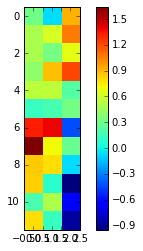

In [123]:
plt.imshow(data[:12, :], interpolation='nearest')
plt.colorbar()

## Color-value mappings are represented by a "colormap"
There are lots of pre-made colormaps out there, each serving different purposes!

In [124]:
Image(url="http://www.astrouw.edu.pl/~jskowron/python/cmap_all.png", width=600)

## Quick Discussion: Colormaps Can Be Misleading when Used Inappropriately

### Example Image ###

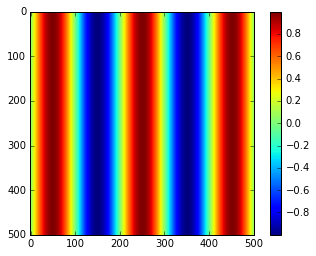

In [125]:
sines = np.repeat(np.matrix(np.sin(np.linspace(0, 5 * np.pi, 500))), 500, axis=0)
plt.imshow(sines, cmap='jet')
plt.colorbar()

Tip: Use 'viridis', 'magma',  instead of the default 'jet' colormap. 

For More Info on perception and colormaps: 
  - https://bids.github.io/colormap/
  - https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/
  - http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html
  - http://matplotlib.org/users/colormaps.html
  - http://www.husl-colors.org/  
  
  

## Correlation Matrices!

In [126]:
data_corr = np.corrcoef(data, rowvar=False)
data_corr

array([[ 1.          ,  0.7894959727, -0.0275018103],
       [ 0.7894959727,  1.          , -0.0731209136],
       [-0.0275018103, -0.0731209136,  1.          ]])

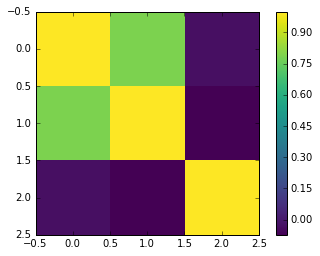

In [127]:
plt.imshow(data_corr, interpolation='nearest', cmap='viridis')
plt.colorbar()

# Discussion